<a href="https://colab.research.google.com/github/41915074/python/blob/main/%EC%95%84%ED%8C%8C%ED%8A%B8_%EB%A7%A4%EB%A7%A4api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xmltodict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import requests
import xmltodict
import json

url = 'http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade'
params = {
    'serviceKey': 's9d24DID8McX9iHiTGEso0ztWsa4PWO7VTdsHYHrWLcLZWsVU8SWuuPHlsbg8/b0Zc80XqjGWuiP1Y+xKsxCzw==',
    'LAWD_CD': '41480',
    'DEAL_YMD': '201512'
}

res = requests.get(url, params=params)
xml_data = res.content

json_data = xmltodict.parse(xml_data)
json_file = json.dumps(json_data, indent=4, ensure_ascii=False)

# JSON 문자열을 딕셔너리로 변환
data_dict = json.loads(json_file)

# 원하는 인덱스 값을 정수로 변경하여 가져오기
index = 1
value = data_dict['response']['body']['items']['item'][index]

print(value)

{'거래금액': '18,000', '거래유형': None, '건축년도': '2004', '년': '2015', '법정동': '금촌동', '아파트': '쇠재마을5단지뜨란채주공', '월': '12', '일': '1', '전용면적': '59.94', '중개사소재지': None, '지번': '1003', '지역코드': '41480', '층': '4', '해제사유발생일': None, '해제여부': None}


In [3]:
import pandas as pd
from pandas import json_normalize

data_dict = json.loads(json_file)

df = json_normalize(data_dict['response']['body']['items']['item'])

print(df.columns)

df = df.drop_duplicates(subset=['건축년도', '아파트'])

df

Index(['거래금액', '거래유형', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '중개사소재지',
       '지번', '지역코드', '층', '해제사유발생일', '해제여부'],
      dtype='object')


,거래금액,거래유형,건축년도,년,법정동,아파트,월,일,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부
0,"7,900",None,2013,2015,금촌동,보광그랑베르,12,1,15.7838,None,792-3,41480,12,None,None
1,"18,000",None,2004,2015,금촌동,쇠재마을5단지뜨란채주공,12,1,59.94,None,1003,41480,4,None,None
2,"8,400",None,1990,2015,금촌동,홍우(768-1),12,1,50.22,None,768-1,41480,2,None,None
3,"18,000",None,1998,2015,금촌동,건일장미(228-1),12,1,84.87,None,228-1,41480,7,None,None
6,"10,800",None,1997,2015,금촌동,주공(922-0),12,1,39.99,None,922,41480,15,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,"12,000",None,1998,2015,조리읍 봉일천리,송촌토파즈(13-15),12,14,84.96,None,13-15,41480,20,None,None
329,"12,100",None,1997,2015,조리읍 봉일천리,성호(125-22),12,15,59.965,None,125-22,41480,16,None,None
333,"12,300",None,1997,2015,조리읍 봉일천리,성원(156-1),12,30,59.59,None,156-1,41480,1,None,None
335,"22,000",None,2000,2015,조리읍 대원리,그린시티동문(218-0),12,5,134.66,None,218,41480,12,None,None


In [4]:
df.to_excel(excel_writer="부동산_list.xlsx")

In [13]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [5]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font',family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

<ipython-input-8-7444255f0335>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['거래금액'] = df_filtered['거래금액'].str.replace(',', '').astype(float)
<ipython-input-8-7444255f0335>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['x_labels'] = df_filtered['법정동'] + ' ' + df_filtered['아파트']


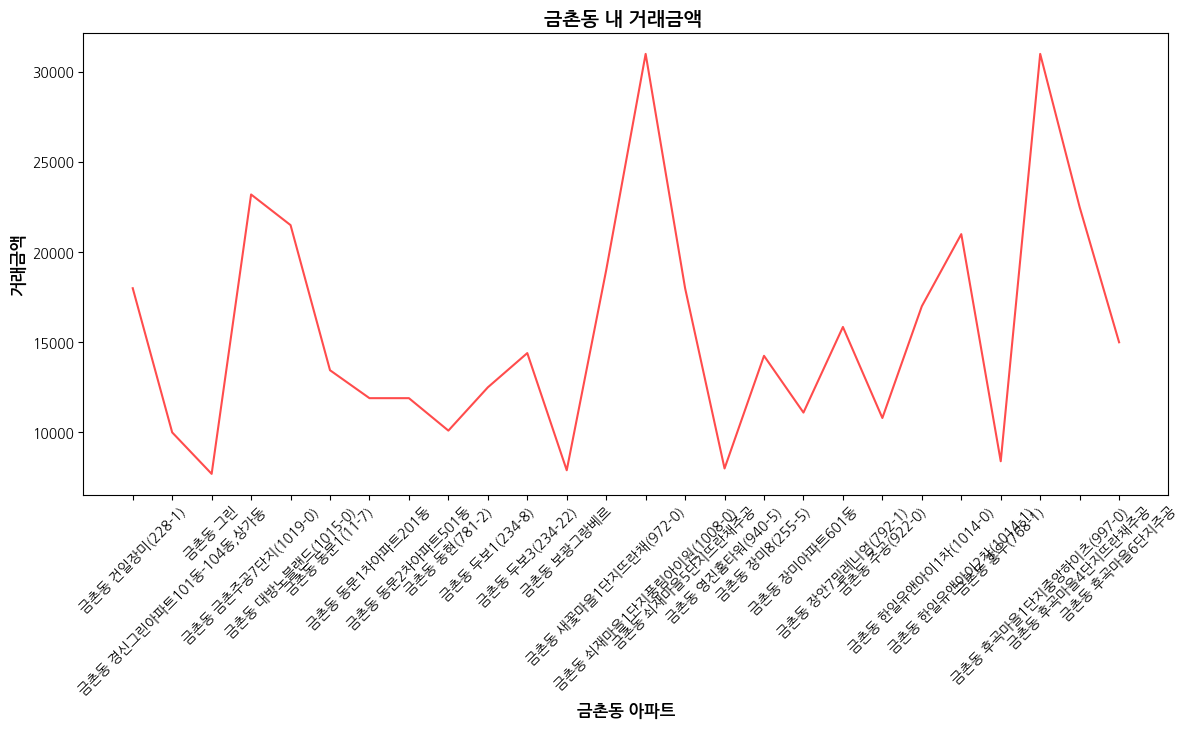

In [8]:
import matplotlib.pyplot as plt

df_filtered = df[df['법정동'] == '금촌동']

df_filtered['거래금액'] = df_filtered['거래금액'].str.replace(',', '').astype(float)

df_filtered['x_labels'] = df_filtered['법정동'] + ' ' + df_filtered['아파트']

df_avg = df_filtered.groupby('x_labels')['거래금액'].mean().reset_index()

fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 1, 1)

ax.plot(df_avg.index, df_avg['거래금액'], color='r', lw=1.5, alpha=0.7)

ax.set_ylabel('거래금액', fontweight='bold', fontsize=12)
ax.set_xlabel('금촌동 아파트', fontweight='bold', fontsize=12)
ax.set_title('금촌동 내 거래금액 ', fontweight='bold', fontsize=14)

ax.set_xticks(df_avg.index)
ax.set_xticklabels(df_avg['x_labels'], rotation=45)

plt.show()

<ipython-input-7-215cacb8a7ff>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['거래금액'] = df_filtered['거래금액'].str.replace(',', '').astype(float)
<ipython-input-7-215cacb8a7ff>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['x_labels'] = df_filtered['법정동'] + ' ' + df_filtered['아파트']


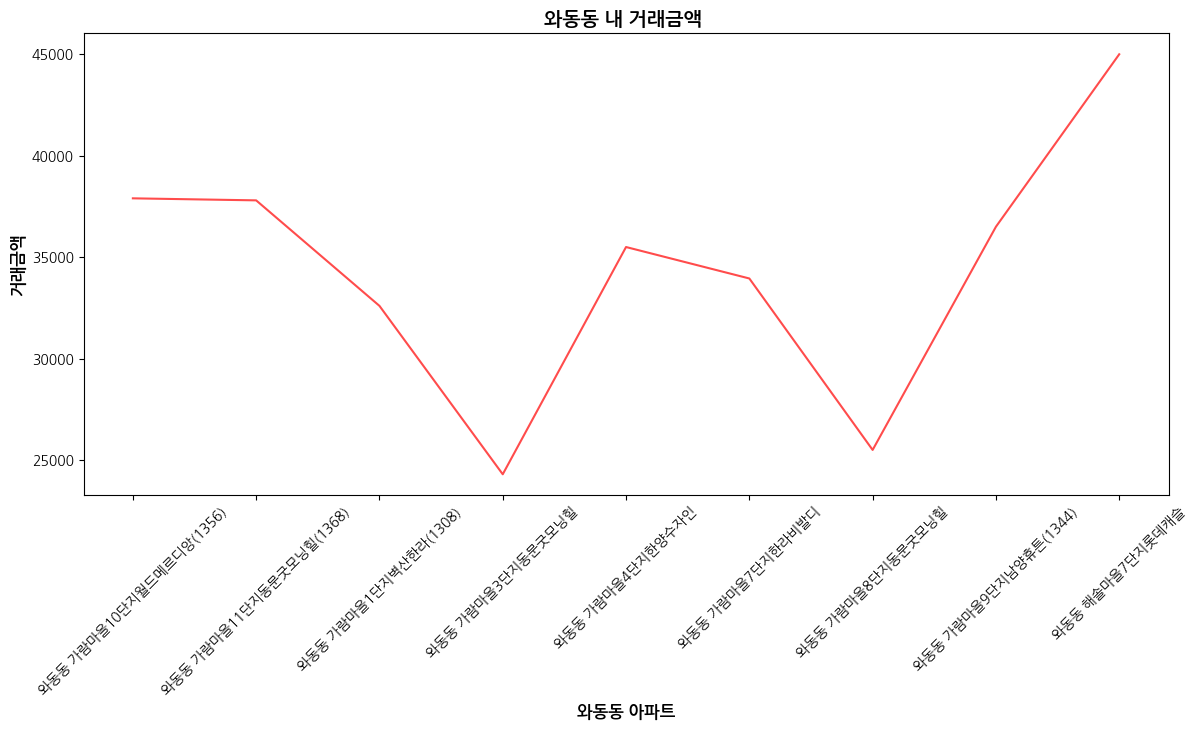

In [7]:
import matplotlib.pyplot as plt

# Filter the DataFrame for '와동동' in '법정동' column
df_filtered = df[df['법정동'] == '와동동']

# Remove commas from '거래금액' column values
df_filtered['거래금액'] = df_filtered['거래금액'].str.replace(',', '').astype(float)

# Concatenate '법정동' and '아파트' columns for x-axis labels
df_filtered['x_labels'] = df_filtered['법정동'] + ' ' + df_filtered['아파트']

# Calculate the average transaction values by 법정동
df_avg = df_filtered.groupby('x_labels')['거래금액'].mean().reset_index()

fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 1, 1)

ax.plot(df_avg.index, df_avg['거래금액'], color='r', lw=1.5, alpha=0.7)

ax.set_ylabel('거래금액', fontweight='bold', fontsize=12)
ax.set_xlabel('와동동 아파트', fontweight='bold', fontsize=12)
ax.set_title('와동동 내 거래금액 ', fontweight='bold', fontsize=14)

ax.set_xticks(df_avg.index)
ax.set_xticklabels(df_avg['x_labels'], rotation=45)

plt.show()
